# Class Imbalance Methods

<div class="alert alert-block alert-warning">
  
<b>Notebook objectives:</b>
    
* Evaluate class imbalance methods (i.e., under-sampling, over-sampling, and over-under sampling combined).
    
    
* Search for best hyperparameters on class imbalance methods.
    
    
* Conduct visual representation of the class imbalance methods to better understand the transformations.

# 1. Notebook set up

In [1]:
# Try downgrading pandas version if loading pickle files throws an error while loading
# %pip install pandas==1.4.1

In [3]:
# install packages if error occurs
# !pip install imblearn

In [2]:
# %pip install numpy==1.21.4

In [3]:
###### Import packages

# Data handling
import numpy as np
import pandas as pd
from numpy import where
from numpy import mean
import datetime as dt
#from IPython.display import HTML, Image #display formatted texts
import warnings
warnings.filterwarnings('ignore')

# Plotting packages
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn') # pretty graphs
from matplotlib import pyplot
import matplotlib.ticker as mticker
from matplotlib.ticker import FormatStrFormatter, StrMethodFormatter, FuncFormatter
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go


# Files to pickle
import pickle
import bz2
import _pickle as cPickle

# X and y split
from sklearn.model_selection import train_test_split


# Models
# Cross-validation
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold, KFold


# Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, roc_curve, auc, roc_auc_score, accuracy_score, precision_score, recall_score, average_precision_score, f1_score, make_scorer
from sklearn.inspection import partial_dependence

# Class Imbalance
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN, BorderlineSMOTE, SVMSMOTE, KMeansSMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss, EditedNearestNeighbours, RepeatedEditedNearestNeighbours, CondensedNearestNeighbour, OneSidedSelection, NeighbourhoodCleaningRule, InstanceHardnessThreshold, TomekLinks
from sklearn.cluster import KMeans
from collections import Counter
from itertools import chain
from sklearn.datasets import make_classification

# Pipeline
#from sklearn.compose import make_column_transformer

# Imbalancer Learn Pipeline
from imblearn.pipeline import Pipeline, make_pipeline

# Load bars
from tqdm.notebook import tqdm_notebook
from tqdm import tqdm
import time


# time progress bar
from tqdm.notebook import tqdm_notebook
from tqdm import tqdm
import time

# Google path set up
pickles = "/content/drive/MyDrive/pickles/"
pickles_w1 = "/content/drive/MyDrive/pickles/w1/"
pickles_w2 = "/content/drive/MyDrive/pickles/w2/"
pickles_w3 = "/content/drive/MyDrive/pickles/w3/"
pickles_w4 = "/content/drive/MyDrive/pickles/w4/"
pickles_w5 = "/content/drive/MyDrive/pickles/w5/"
pickles_imbalance = "/content/drive/MyDrive/pickles/class_imbalance_learn/"

# Path set up
path = "/project/data/"
path_w1 = "/project/data/w1/"
path_w2 = "/project/data/w2/"
path_w3 = "/project/data/w3/"
path_w4 = "/project/data/w4/"
path_w5 = "/project/data/w5/"
json_path = "/project/notebooks/map/KEYFILE.json"
path_feature = "/project/data/feature_importance/"
path_imbalance = "/project/data/class_imbalance_learn/"


# fixed values
seed = 2323
colors = {'c1':['#5770db', '#db5e57'], 'c2': ['#db5e57', '#5770db', '#dbc257', '#90db57', '#15becf']}
bar_width = 0.3
bin_num = 25
size = {'small_tick': 9, 'tick': 10 , 'label': 14, 'sub_title': 16, 'main_title': 20}
fig_size = {'large': (30,25), 'small': (10, 5)}

# pandas display set up
pd.options.display.max_columns = None

# 2. Loading pre-processed X and y

In [4]:
# Loading X
pickled_data_X = bz2.BZ2File(path_w2 + 'X_train_dense_w2_1pct', 'rb')
X_train = cPickle.load(pickled_data_X)
pickled_data_X.close()
print(F"X_train shape: rows {X_train.shape[0]}, columns {X_train.shape[1]}")

X_train shape: rows 338282, columns 304


In [5]:
# Loading y (target)
pickled_data_y = bz2.BZ2File(path_w2 + 'y_train_dense_w2_1pct', 'rb')
y_train = cPickle.load(pickled_data_y)
pickled_data_y.close()
y_train.reset_index(drop = True, inplace =  True)
print(F"y_train shape: rows {y_train.shape[0]}, columns 1")

y_train shape: rows 338282, columns 1


### Class Imbalance Pipeline

In [7]:
# Define pipeline
#over_sampler = RandomOverSampler(sampling_strategy=0.05, random_state = seed)
over_sampler = SMOTE(k_neighbors=8, sampling_strategy=0.1, random_state = seed)
under_sampler = RandomUnderSampler(sampling_strategy=0.5, random_state = seed)

steps = [('over', over_sampler), ('under', under_sampler)]
pipeline = Pipeline(steps=steps)

In [8]:
X_resampled, y_resampled = pipeline.fit_resample(X_train, y_train)

In [6]:
# transform train and test files to pickle form
export_files = {1:(X_resampled, 'X_resampled'), 2:(y_resampled,'y_resampled')}

for i in tqdm(export_files):
    sfile = bz2.BZ2File(path_w2 + export_files[i][1] +'_w2_1pct', 'w')
    pickle.dump(export_files[i][0],sfile)
    sfile.close()

100%|██████████| 2/2 [00:07<00:00,  3.85s/it]


# 4. Class imbalance methods

## 4.1 Undersampling methods

### Random under sampler

In [33]:
# Initializing imbalance ratio
counter = Counter(y_train)
print(counter)
# Defining undersampler
undersampler_1 = RandomUnderSampler(random_state=seed)
# Transform the dataset
X_train_under, y_train_under = undersampler_1.fit_resample(X_train, y_train)
# Output new class imbalance ratio
counter_under = Counter(y_train_under)
print(counter_under)

Counter({0: 338055, 1: 227})
Counter({0: 227, 1: 227})


### Near miss version 1

In [9]:
### NearMiss 1 - searching n neighbors hyperparameter
n_values = np.arange(1,11)
scores_auc = []
for n in n_values:
    # pipeline under sampler + classifier
    base_classifier = RandomForestClassifier(n_estimators = 100, max_depth = 10, random_state = seed)
    under_sampler = NearMiss(version=1, n_neighbors=n)
    steps = [('under_sampler', under_sampler), ('classifier', base_classifier)]
    pipeline = Pipeline(steps=steps)
    # evaluate pipeline
    kfolds = model_selection.StratifiedKFold(n_splits = 5, shuffle = True, random_state = seed)
    c_scores = cross_val_score(pipeline, X_train, y_train, scoring='roc_auc', cv=kfolds, n_jobs=-1)
    scores_auc.append(('n_'+ n.astype(str),mean(c_scores)))
    print(F'n={n}, mean roc auc score {mean(c_scores):,.3f}')

# export n-neighbors search as csv
nearmiss1_search_n = pd.DataFrame(scores_auc, columns = ['n_neighbors', 'k-fold cross validation mean auc'])
nearmiss1_search_n.to_csv(path_imbalance + 'nearmiss1_search_n.csv', index = True, index_label = False)

n=1, mean roc auc score 0.615
n=2, mean roc auc score 0.607
n=3, mean roc auc score 0.584
n=4, mean roc auc score 0.585
n=5, mean roc auc score 0.581
n=6, mean roc auc score 0.583
n=7, mean roc auc score 0.578
n=8, mean roc auc score 0.586
n=9, mean roc auc score 0.584
n=10, mean roc auc score 0.582


In [11]:
# Initializing imbalance ratio
counter = Counter(y_train)
print(counter)
# Defining undersampler
undersampler_2 = NearMiss(version=1, n_neighbors=1)
# Transform the dataset
X_train_under, y_train_under = undersampler_2.fit_resample(X_train, y_train)
# Output new class imbalance ratio
counter_under = Counter(y_train_under)
print(counter_under)

Counter({0: 338055, 1: 227})
Counter({0: 227, 1: 227})


### Near miss version 2

In [ ]:
### NearMiss 2 - searching n neighbors hyperparameter
n_values = np.arange(1,11)
scores_auc = []

for n in n_values:
    # pipeline under sampler + classifier
    base_classifier = RandomForestClassifier(n_estimators = 100, max_depth = 10, random_state = seed)
    under_sampler = NearMiss(version=2, n_neighbors=n)
    steps = [('under', under_sampler), ('classifier', base_classifier)]
    pipeline = Pipeline(steps=steps)
    # evaluate pipeline
    kfolds = model_selection.StratifiedKFold(n_splits = 5, shuffle = True, random_state = seed)
    c_scores = cross_val_score(pipeline, X_train, y_train, scoring='roc_auc', cv=kfolds, n_jobs=-1)
    scores_auc.append(('n_'+ n.astype(str),mean(c_scores)))
    print(F'n={n}, Mean ROC AUC {mean(c_scores):,.3f}')
    
# export n-neighbors search as csv
nearmiss2_search_n = pd.DataFrame(scores_auc, columns = ['n_neighbors', 'k-fold cross validation mean auc'])
nearmiss2_search_n.to_csv(path_imbalance + 'nearmiss2_search_n.csv', index = True, index_label = False)

n=1, Mean ROC AUC 0.499
n=2, Mean ROC AUC 0.499
n=3, Mean ROC AUC 0.495
n=4, Mean ROC AUC 0.498
n=5, Mean ROC AUC 0.488
n=6, Mean ROC AUC 0.513
n=7, Mean ROC AUC 0.510
n=8, Mean ROC AUC 0.516
n=9, Mean ROC AUC 0.513
n=10, Mean ROC AUC 0.517


In [12]:
# Initializing imbalance ratio
counter = Counter(y_train)
print(counter)
# Defining undersampler
undersampler_3 = NearMiss(version=2, n_neighbors=8)
# Transform the dataset
X_train_under, y_train_under = undersampler_3.fit_resample(X_train, y_train)
# Output new class imbalance ratio
counter_under = Counter(y_train_under)
print(counter_under)

Counter({0: 338055, 1: 227})
Counter({0: 227, 1: 227})


### Near miss version 3

In [ ]:
### NearMiss 3 - searching n neighbors hyperparameter
n_values = np.arange(1,11)
scores_auc = []
for n in n_values:
    # pipeline under sampler + classifier
    base_classifier = RandomForestClassifier(n_estimators = 100, max_depth = 10, random_state = seed)
    under_sampler = NearMiss(version=3, n_neighbors=n)
    steps = [('under', under_sampler), ('classifier', base_classifier)]
    pipeline = Pipeline(steps=steps)
    # evaluate pipeline
    kfolds = model_selection.StratifiedKFold(n_splits = 5, shuffle = True, random_state = seed)
    c_scores = cross_val_score(pipeline, X_train, y_train, scoring='roc_auc', cv=kfolds, n_jobs=-1)
    scores_auc.append(('n_'+ n.astype(str),mean(c_scores)))
    print(F'n={n}, Mean ROC AUC {mean(c_scores):,.3f}')
    
# export n-neighbors search as csv
nearmiss3_search_n = pd.DataFrame(scores_auc, columns = ['n_neighbors', 'k-fold cross validation mean auc'])
nearmiss3_search_n.to_csv(path_imbalance + 'nearmiss3_search_n.csv', index = True, index_label = False)

n=1, Mean ROC AUC 0.451
n=2, Mean ROC AUC 0.451
n=3, Mean ROC AUC 0.448
n=4, Mean ROC AUC 0.443
n=5, Mean ROC AUC 0.453
n=6, Mean ROC AUC 0.450
n=7, Mean ROC AUC 0.449
n=8, Mean ROC AUC 0.449
n=9, Mean ROC AUC 0.457
n=10, Mean ROC AUC 0.448


In [13]:
# Initializing imbalance ratio
counter = Counter(y_train)
print(counter)
# Defining undersampler
undersampler_4 = NearMiss(version=3, n_neighbors=9)
# Transform the dataset
X_train_under, y_train_under = undersampler_4.fit_resample(X_train, y_train)
# Output new class imbalance ratio
counter_under = Counter(y_train_under)
print(counter_under)

Counter({0: 338055, 1: 227})
Counter({0: 227, 1: 227})


### One sided selection

In [ ]:
### Onesidedselection - searching k neighbors hyperparameter
n_values = [x for x in range(1,11)]
scores_auc = []
for n in n_values:
    # pipeline under sampler + classifier
    base_classifier = RandomForestClassifier(n_estimators = 100, max_depth = 10, random_state = seed)
    under_sampler = OneSidedSelection(n_neighbors=n, n_seeds_S=10000, random_state = seed)
    steps = [('under', under_sampler), ('classifier', base_classifier)]
    pipeline = Pipeline(steps=steps)
    # evaluate pipeline
    kfolds = model_selection.StratifiedKFold(n_splits = 5, shuffle = True, random_state = seed)
    c_scores = cross_val_score(pipeline, X_train, y_train, scoring='roc_auc', cv=kfolds, n_jobs=-1)
    scores_auc.append(('n_'+ str(n), mean(c_scores)))
    print(F'n={n}, Mean ROC AUC {mean(c_scores):,.3f}')
    
# export n-neighbors search as csv
oneside_search_n = pd.DataFrame(scores_auc, columns = ['n_neighbors', 'k-fold cross validation mean auc'])
oneside_search_n.to_csv(path_imbalance + 'oneside_search_n.csv', index = True, index_label = False)

n=1, Mean ROC AUC 0.683
n=2, Mean ROC AUC 0.675
n=3, Mean ROC AUC 0.691
n=4, Mean ROC AUC 0.686
n=5, Mean ROC AUC 0.678
n=6, Mean ROC AUC 0.672
n=7, Mean ROC AUC 0.692
n=8, Mean ROC AUC 0.667
n=9, Mean ROC AUC 0.674
n=10, Mean ROC AUC 0.678


In [14]:
# Initializing imbalance ratio
counter = Counter(y_train)
print(counter)
# Defining undersampler
undersampler_5 = OneSidedSelection(n_neighbors=3, n_seeds_S=10000, random_state = seed)
# transform the dataset
X_train_under, y_train_under = undersampler_5.fit_resample(X_train, y_train)
# Output new class imbalance ratio
counter_under = Counter(y_train_under)
print(counter_under)

Counter({0: 338055, 1: 227})
Counter({0: 10911, 1: 227})


## 4.2 Oversampling methods

### Random over sampler

In [15]:
# Initializing imbalance ratio
counter = Counter(y_train)
print(counter)
# Defining oversampler
oversampler_1 = RandomOverSampler(sampling_strategy='minority')
# Transform the dataset
X_train_over, y_train_over = oversampler_1.fit_resample(X_train, y_train)
# Output new class imbalance ratio
counter = Counter(y_train_over)
print(counter)

Counter({0: 338055, 1: 227})
Counter({0: 338055, 1: 338055})


### SMOTE

In [ ]:
### SMOTE - searching k neighbors hyperparameter
k_values = np.arange(1,11)
scores_auc = []
for k in k_values:
    # pipeline over sampler + classifier
    base_classifier = LogisticRegression(random_state = seed)
    over_sampler = SMOTE(k_neighbors=k, random_state = seed)
    steps = [('over_sampler', over_sampler), ('classifier', base_classifier)]
    pipeline = Pipeline(steps=steps)
    # evaluate pipeline
    kfolds = model_selection.StratifiedKFold(n_splits = 5, shuffle = True, random_state = seed)
    c_scores = cross_val_score(pipeline, X_train, y_train, scoring='roc_auc', cv=kfolds, n_jobs=-1)
    scores_auc.append(('k_'+ k.astype(str),mean(c_scores)))
    print(F'k={k}, Mean ROC AUC {mean(c_scores):,.3f}')
    
# export k-neighbors search as csv
smote_search_k = pd.DataFrame(scores_auc, columns = ['k_neighbors', 'k-fold cross validation mean auc'])
smote_search_k.to_csv(path_imbalance + 'smote_search_k.csv', index = True, index_label = False)

k=1, Mean ROC AUC 0.599
k=2, Mean ROC AUC 0.603
k=3, Mean ROC AUC 0.609
k=4, Mean ROC AUC 0.610
k=5, Mean ROC AUC 0.612
k=6, Mean ROC AUC 0.609
k=7, Mean ROC AUC 0.611
k=8, Mean ROC AUC 0.612
k=9, Mean ROC AUC 0.612
k=10, Mean ROC AUC 0.613


In [16]:
# Initializing imbalance ratio
counter = Counter(y_train)
print(counter)
# Defining oversampler
oversampler_2 = SMOTE(k_neighbors=8, random_state = seed)
# Transform the dataset
X_train_over, y_train_over = oversampler_2.fit_resample(X_train, y_train)
# Output new class imbalance ratio
counter_over = Counter(y_train_over)
print(counter_over)

Counter({0: 338055, 1: 227})
Counter({0: 338055, 1: 338055})


### Boderline SMOTE

In [ ]:
### Borderline - searching k neighbors hyperparameter
k_values = np.arange(1,11)
scores_auc = []
for k in k_values:
    # pipeline over sampler + classifier
    base_classifier = LogisticRegression(random_state = seed)
    over_sampler = BorderlineSMOTE(k_neighbors=k, random_state = seed)
    steps = [('over_sampler', over_sampler), ('classifier', base_classifier)]
    pipeline = Pipeline(steps=steps)
    # evaluate pipeline
    kfolds = model_selection.StratifiedKFold(n_splits = 5, shuffle = True, random_state = seed)
    c_scores = cross_val_score(pipeline, X_train, y_train, scoring='roc_auc', cv=kfolds, n_jobs=-1)
    scores_auc.append(('k_'+ k.astype(str),mean(c_scores)))
    print(F'k={k}, Mean ROC AUC {mean(c_scores):,.3f}')
    
# export k-neighbors search as csv
boderline_search_k = pd.DataFrame(scores_auc, columns = ['k_neighbors', 'k-fold cross validation mean auc'])
boderline_search_k.to_csv(path_imbalance + 'borderline_search_k.csv', index = True, index_label = False)

k=1, Mean ROC AUC 0.563
k=2, Mean ROC AUC 0.529
k=3, Mean ROC AUC 0.512
k=4, Mean ROC AUC 0.501
k=5, Mean ROC AUC 0.505
k=6, Mean ROC AUC 0.502
k=7, Mean ROC AUC 0.511
k=8, Mean ROC AUC 0.503
k=9, Mean ROC AUC 0.504
k=10, Mean ROC AUC 0.515


In [17]:
# Initializing imbalance ratio
counter = Counter(y_train)
print(counter)
# Defining oversampler
oversampler_3 = BorderlineSMOTE(k_neighbors=1, random_state = seed)
# Transform the dataset
X_train_over, y_train_over = oversampler_3.fit_resample(X_train, y_train)
# Output new class imbalance ratio
counter_over = Counter(y_train_over)
print(counter_over)

Counter({0: 338055, 1: 227})
Counter({0: 338055, 1: 338055})


### Adasyn

In [ ]:
### adasyn - searching k neighbors hyperparameter
k_values = np.arange(1,11)
scores_auc = []
for k in k_values:
    # pipeline over sampler + classifier
    base_classifier = LogisticRegression(random_state = seed)
    over_sampler = ADASYN(n_neighbors=k, random_state = seed)
    steps = [('over_sampler', over_sampler), ('classifier', base_classifier)]
    pipeline = Pipeline(steps=steps)
    # evaluate pipeline
    kfolds = model_selection.StratifiedKFold(n_splits = 5, shuffle = True, random_state = seed)
    c_scores = cross_val_score(pipeline, X_train, y_train, scoring='roc_auc', cv=kfolds, n_jobs=-1)
    scores_auc.append(('k_'+ k.astype(str),mean(c_scores)))
    print(F'k={k}, Mean ROC AUC {mean(c_scores):,.3f}')
    
# export k-neighbors search as csv
adasyn_search_k = pd.DataFrame(scores_auc, columns = ['k_neighbors', 'k-fold cross validation mean auc'])
adasyn_search_k.to_csv(path_imbalance + 'adasyn_search_k.csv', index = True, index_label = False)

k=1, Mean ROC AUC 0.601
k=2, Mean ROC AUC 0.606
k=3, Mean ROC AUC 0.607
k=4, Mean ROC AUC 0.608
k=5, Mean ROC AUC 0.613
k=6, Mean ROC AUC 0.612
k=7, Mean ROC AUC 0.610
k=8, Mean ROC AUC 0.612
k=9, Mean ROC AUC 0.612
k=10, Mean ROC AUC 0.613


In [18]:
# Initializing imbalance ratio
counter = Counter(y_train)
print(counter)
# Defining oversampler
oversampler_4 = ADASYN(n_neighbors=8, random_state = seed)
# Transform the dataset
X_train_over, y_train_over = oversampler_4.fit_resample(X_train, y_train)
# Output new class imbalance ratio
counter_over = Counter(y_train_over)
print(counter_over)

Counter({0: 338055, 1: 227})
Counter({0: 338055, 1: 337959})


# 5. K-fold cross validation Class Imbalance Methods

## 5.1 K-fold cross validation baseline

In [31]:
##### Defining k-fold cross validation ofr under sampling methods

# Defining base classifier
classifiers = [('RandomForest', RandomForestClassifier(random_state = seed))] 


# Defining classifying scoring metrics
scoring = {'auc': 'roc_auc', 'accuracy':'accuracy','recall':'recall', 'precision': 'precision', 'f1_score': 'f1_micro'} #'F1': 'f1_micro', 'Precision': 'precision', 


results_base = [] # append results
# Run k-fold cross validation for under sampling methods and selected model
        
kfolds = model_selection.StratifiedKFold(n_splits = 5, shuffle = True, random_state = seed)
cv_results = model_selection.cross_validate(classifiers[0][1], X_train, y_train, cv = kfolds, scoring = scoring ) #'roc_auc'
results_base.append(cv_results)

# Computing baseline as df
m_scores = ['test_auc','test_accuracy','test_recall','test_precision','test_f1_score']
store_scores_base = {}

for metric in m_scores:
    store_scores_base[metric] = (results_base[0][metric].mean(),results_base[0][metric].std())
    
results_base_df = pd.DataFrame.from_dict(store_scores_base, orient='index', columns = ['mean', 'sd'])
results_base_df

,mean,sd
test_auc,0.541261,0.026797
test_accuracy,0.999329,0.000007
test_recall,0.000000,0.000000
test_precision,0.000000,0.000000
test_f1_score,0.999329,0.000007


## 5.2 K-fold cross validation under sampling methods

In [34]:
##### Defining k-fold cross validation ofr under sampling methods

### Defining under sampling methods
under_samplers = [('random_under', undersampler_1),
                   ('Nearmiss_1', undersampler_2),
                   ('Nearmiss_2', undersampler_3),
                   ('Nearmiss_3', undersampler_4),
                   ('OneSideSelection', undersampler_5)]

### Defining base classifier
classifiers = [('RandomForest', RandomForestClassifier(n_estimators = 100, max_depth = 10, random_state = seed))] 

# Defining classifying scoring metrics
scoring = {'auc': 'roc_auc', 'accuracy':'accuracy','recall':'recall', 'precision': 'precision', 'f1_score': 'f1_micro'} #'F1': 'f1_micro', 'Precision': 'precision', 

# scoring = {'auc' : make_scorer(roc_auc_score, needs_proba = True),
#            'accuracy': make_scorer(accuracy_score),
#            'recall' : make_scorer(recall_score),
#            'precision' : make_scorer(precision_score),
#            'f1_score' : make_scorer(f1_score)}


results_under = {} # append results

### Run k-fold cross validation for under sampling methods and selected model
for under_s in tqdm(under_samplers):
    for model in classifiers:
        
        steps_under = [under_s, model]
        pipeline = Pipeline(steps = steps_under)
        
        kfolds = model_selection.StratifiedKFold(n_splits=5, shuffle=True, random_state = seed)
        cv_results = model_selection.cross_validate(pipeline, X_train, y_train, cv = kfolds, scoring = scoring)
        results_under[under_s[0]] = (cv_results)

### results in df form
m_scores = ['test_auc','test_accuracy','test_recall','test_precision','test_f1_score']
store_scores_under = []
for sampler in under_samplers:
    for metric in m_scores:
        store_scores_under.append((sampler[0],metric,results_under[sampler[0]][metric].mean(),results_under[sampler[0]][metric].std()))

results_under_df = pd.DataFrame(store_scores_under, columns = ['sampler','metric','mean','sd'])

100%|██████████| 5/5 [02:36<00:00, 31.37s/it]


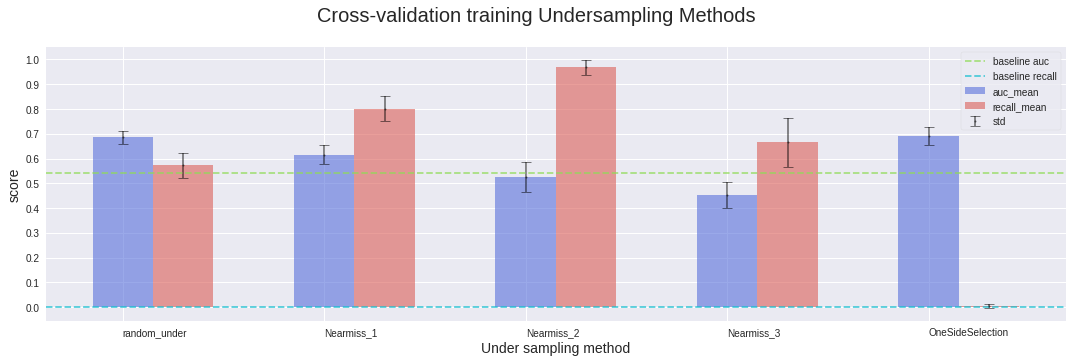

In [37]:
##### Plot under sampling k-fold validation results

### Set up for plotting
fig, axs = plt.subplots(1,1, figsize=(15, 5)) # Create figure and axes

### plotting variable distribution
for idx,metric in enumerate([('test_auc', 'test_recall')]):
    temp_df = results_under_df[(results_under_df['metric'] == metric[0]) | (results_under_df['metric'] == metric[1])]
    temp_m1 = temp_df[temp_df['metric'] == metric[0]]
    temp_m2 = temp_df[temp_df['metric'] == metric[1]]                        
    x1_pos = np.arange(len(temp_m1))
    x2_pos = [x+bar_width for x in x1_pos]
    x_axis = temp_df['sampler'].unique().tolist()
    baseline_auc = results_base_df.iloc[0][0]
    baseline_rec = results_base_df.iloc[2][0]
                            
    axs.bar(x1_pos, temp_m1['mean'], color= colors['c1'][0], label = metric[0][5:] + '_mean', width = bar_width, alpha = 0.6)
    axs.bar(x2_pos, temp_m2['mean'], color = colors['c1'][1], label = metric[1][5:] + '_mean', width = bar_width, alpha = 0.6)
    axs.errorbar(x1_pos, temp_m1['mean'], temp_m1['sd'], fmt='.', color = 'black', label = 'std' , capthick=1, alpha=0.5, ms=4, capsize=5)
    axs.errorbar(x2_pos, temp_m2['mean'], temp_m2['sd'], fmt='.', color = 'black', capthick=1, alpha=0.5, ms=4, capsize=5)
    axs.axhline(y=baseline_auc, xmin = min(x1_pos), xmax = max(x1_pos),color = colors['c2'][3],label = 'baseline auc' ,alpha=0.75, linestyle = '--' )
    axs.axhline(y=baseline_rec, xmin = min(x1_pos), xmax = max(x1_pos),color = colors['c2'][4],label = 'baseline recall' ,alpha=0.75, linestyle = '--' )

    # Plot configuration
    axs.set_xticks(x1_pos)
    axs.set_xlabel('Under sampling method', fontsize = size['label']) # xlabel name
    axs.set_ylabel('score', fontsize = size['label']) # ylabel name
    axs.legend(loc = 'upper right', frameon = True)
    axs.yaxis.set_major_formatter(StrMethodFormatter('{x:,.1f}'))
    axs.set_yticks(np.arange(0, 1.1, 0.1))
    axs.set_xticklabels(x_axis, rotation = 0, fontsize = size['tick'], horizontalalignment = 'left')
    axs.tick_params(axis = 'both', which = 'major', labelsize = size['tick'])

fig.suptitle('Cross-validation Training Undersampling Methods', fontsize = size['main_title'], y = 0.9999)

plt.tight_layout(w_pad=2.5, h_pad=0.1)
plt.show()

## 5.3 K-fold cross validation over sampling methods

In [36]:
##### Defining k-fold cross validation ofr under sampling methods

# Defining under sampling methods
over_samplers = [('random_over', oversampler_1),
                   ('SMOTE', oversampler_2),
                   ('BoderLineSMOTE', oversampler_3),
                   ('ADASYN', oversampler_4)]

# Defining base classifier
classifiers = [('RandomForest', RandomForestClassifier(random_state = seed))] 


# Defining classifying scoring metrics
scoring = {'auc': 'roc_auc', 'accuracy':'accuracy','recall':'recall', 'precision': 'precision', 'f1_score': 'f1_micro'} #'F1': 'f1_micro', 'Precision': 'precision', 

# scoring = {'auc' : make_scorer(roc_auc_score, needs_proba = True),
#            'accuracy': make_scorer(accuracy_score),
#            'recall' : make_scorer(recall_score),
#            'precision' : make_scorer(precision_score),
#            'f1_score' : make_scorer(f1_score)}



results_over = {} # append results

# Run k-fold cross validation for under sampling methods and selected model
for over_s in tqdm(over_samplers):
    for model in classifiers:
        
        steps = [over_s, model]
        pipeline = Pipeline(steps = steps)
        
        kfold = model_selection.StratifiedKFold(n_splits=5, shuffle=True, random_state = seed)
        cv_results = model_selection.cross_validate(pipeline, X_train, y_train, cv=kfold, scoring=scoring)
        results_over[over_s[0]] = cv_results

### results in df form
m_scores = ['test_auc','test_accuracy','test_recall','test_precision','test_f1_score']
store_scores_over = []
for sampler in over_samplers:
    for metric in m_scores:
        store_scores_over.append((sampler[0],metric,results_over[sampler[0]][metric].mean(),results_over[sampler[0]][metric].std()))

results_over_df = pd.DataFrame(store_scores_over, columns = ['sampler','metric','mean','sd'])
results_over_df

100%|██████████| 4/4 [43:29<00:00, 652.42s/it]


,sampler,metric,mean,sd
0,random_over,test_auc,0.559097,0.022531
1,random_over,test_accuracy,0.999338,0.000011
2,random_over,test_recall,0.013237,0.010809
3,random_over,test_precision,0.600000,0.489898
4,random_over,test_f1_score,0.999338,0.000011
5,SMOTE,test_auc,0.553259,0.019085
6,SMOTE,test_accuracy,0.999329,0.000007
7,SMOTE,test_recall,0.000000,0.000000
8,SMOTE,test_precision,0.000000,0.000000
9,SMOTE,test_f1_score,0.999329,0.000007


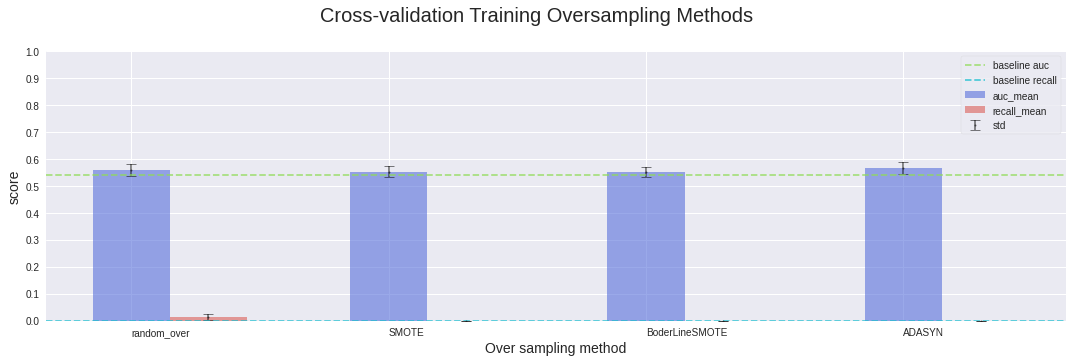

In [38]:
##### Plot under sampling k-fold validation results

### Set up for plotting
fig, axs = plt.subplots(1,1, figsize=(15, 5)) # Create figure and axes

### plotting variable distribution
for idx,metric in enumerate([('test_auc', 'test_recall')]):
    temp_df = results_over_df[(results_over_df['metric'] == metric[0]) | (results_over_df['metric'] == metric[1])]
    temp_m1 = temp_df[temp_df['metric'] == metric[0]]
    temp_m2 = temp_df[temp_df['metric'] == metric[1]]                        
    x1_pos = np.arange(len(temp_m1))
    x2_pos = [x+bar_width for x in x1_pos]
    x_axis = temp_df['sampler'].unique().tolist()
    baseline_auc = results_base_df.iloc[0][0]
    baseline_rec = results_base_df.iloc[2][0]
                            
    axs.bar(x1_pos, temp_m1['mean'], color= colors['c1'][0], label = metric[0][5:] + '_mean', width = bar_width, alpha = 0.6)
    axs.bar(x2_pos, temp_m2['mean'], color = colors['c1'][1], label = metric[1][5:] + '_mean', width = bar_width, alpha = 0.6)
    axs.errorbar(x1_pos, temp_m1['mean'], temp_m1['sd'], fmt='.', color = 'black', label = 'std' , capthick=1, alpha=0.5, ms=4, capsize=5)
    axs.errorbar(x2_pos, temp_m2['mean'], temp_m2['sd'], fmt='.', color = 'black', capthick=1, alpha=0.5, ms=4, capsize=5)
    axs.axhline(y=baseline_auc, xmin = min(x1_pos), xmax = max(x1_pos),color = colors['c2'][3],label = 'baseline auc' ,alpha=0.75, linestyle = '--' )
    axs.axhline(y=baseline_rec, xmin = min(x1_pos), xmax = max(x1_pos),color = colors['c2'][4],label = 'baseline recall' ,alpha=0.75, linestyle = '--' )

    # Plot configuration
    axs.set_xticks(x1_pos)
    axs.set_xlabel('Over sampling method', fontsize = size['label']) # xlabel name
    axs.set_ylabel('score', fontsize = size['label']) # ylabel name
    axs.legend(loc = 'upper right', frameon = True)
    axs.yaxis.set_major_formatter(StrMethodFormatter('{x:,.1f}'))
    axs.set_yticks(np.arange(0, 1.1, 0.1))
    axs.set_xticklabels(x_axis, rotation = 0, fontsize = size['tick'], horizontalalignment = 'left')
    axs.tick_params(axis = 'both', which = 'major', labelsize = size['tick'])

fig.suptitle('Cross-validation Training Oversampling Methods', fontsize = size['main_title'], y = 0.9999)
plt.tight_layout(w_pad=2.5, h_pad=0.1)
plt.show()

In [4]:
10e-4

0.001

## 5.4 K-fold cross validation over and under sampling methods

In [39]:
# define pipeline
model = LogisticRegression(random_state = seed)

over_samplers = [('random_over', RandomOverSampler(sampling_strategy=0.1)),
                   ('SMOTE', SMOTE(sampling_strategy=0.1)),
                   ('BoderLineSMOTE', BorderlineSMOTE(sampling_strategy=0.1)),
                   ('ADASYN', ADASYN(sampling_strategy=0.1))]

results_over_under = {} # append results

# Defining under sampling methods
for over_s in over_samplers:
    under_sampler = RandomUnderSampler(sampling_strategy=0.5)
    steps = [over_s, ('under', under_sampler), ('model', model)]
    pipeline = Pipeline(steps=steps)
    # evaluate pipeline
    kfold = model_selection.StratifiedKFold(n_splits=5, shuffle=True, random_state = seed)
    cv_results = model_selection.cross_validate(pipeline, X_train, y_train, cv=kfold, scoring=scoring)
    results_over_under[over_s[0]] = cv_results

### results in df form
m_scores = ['test_auc','test_accuracy','test_recall','test_precision','test_f1_score']
store_scores_over_under = []
for sampler in over_samplers:
    for metric in m_scores:
        store_scores_over_under.append((sampler[0],metric,results_over_under[sampler[0]][metric].mean(),results_over_under[sampler[0]][metric].std()))

results_over_under_df = pd.DataFrame(store_scores_over_under, columns = ['sampler','metric','mean','sd'])
results_over_under_df 

,sampler,metric,mean,sd
0,random_over,test_auc,0.626121,0.019751
1,random_over,test_accuracy,0.871406,0.003520
2,random_over,test_recall,0.259903,0.042945
3,random_over,test_precision,0.001358,0.000204
4,random_over,test_f1_score,0.871406,0.003520
5,SMOTE,test_auc,0.622288,0.022281
6,SMOTE,test_accuracy,0.860471,0.005352
7,SMOTE,test_recall,0.273140,0.029792
8,SMOTE,test_precision,0.001314,0.000112
9,SMOTE,test_f1_score,0.860471,0.005352


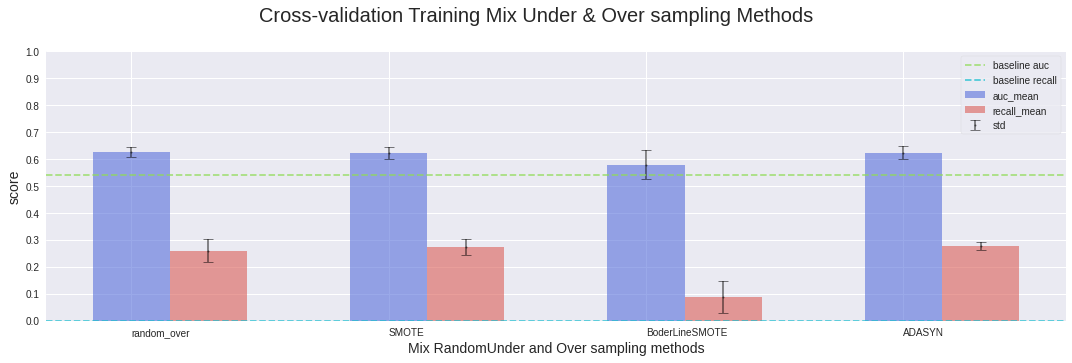

In [40]:
##### Plot under sampling k-fold validation results

### Set up for plotting
fig, axs = plt.subplots(1,1, figsize=(15, 5)) # Create figure and axes

### plotting variable distribution
for idx,metric in enumerate([('test_auc', 'test_recall')]):
    temp_df = results_over_under_df[(results_over_under_df['metric'] == metric[0]) | (results_over_under_df['metric'] == metric[1])]
    temp_m1 = temp_df[temp_df['metric'] == metric[0]]
    temp_m2 = temp_df[temp_df['metric'] == metric[1]]                        
    x1_pos = np.arange(len(temp_m1))
    x2_pos = [x+bar_width for x in x1_pos]
    x_axis = temp_df['sampler'].unique().tolist()
    baseline_auc = results_base_df.iloc[0][0]
    baseline_rec = results_base_df.iloc[2][0]
                            
    axs.bar(x1_pos, temp_m1['mean'], color= colors['c1'][0], label = metric[0][5:] + '_mean', width = bar_width, alpha = 0.6)
    axs.bar(x2_pos, temp_m2['mean'], color = colors['c1'][1], label = metric[1][5:] + '_mean', width = bar_width, alpha = 0.6)
    axs.errorbar(x1_pos, temp_m1['mean'], temp_m1['sd'], fmt='.', color = 'black', label = 'std' , capthick=1, alpha=0.5, ms=4, capsize=5)
    axs.errorbar(x2_pos, temp_m2['mean'], temp_m2['sd'], fmt='.', color = 'black', capthick=1, alpha=0.5, ms=4, capsize=5)
    axs.axhline(y=baseline_auc, xmin = min(x1_pos), xmax = max(x1_pos),color = colors['c2'][3],label = 'baseline auc' ,alpha=0.75, linestyle = '--' )
    axs.axhline(y=baseline_rec, xmin = min(x1_pos), xmax = max(x1_pos),color = colors['c2'][4],label = 'baseline recall' ,alpha=0.75, linestyle = '--' )

    # Plot configuration
    axs.set_xticks(x1_pos)
    axs.set_xlabel('Mix RandomUnder and Over sampling methods', fontsize = size['label']) # xlabel name
    axs.set_ylabel('score', fontsize = size['label']) # ylabel name
    axs.legend(loc = 'upper right', frameon = True)
    axs.yaxis.set_major_formatter(StrMethodFormatter('{x:,.1f}'))
    axs.set_yticks(np.arange(0, 1.1, 0.1))
    axs.set_xticklabels(x_axis, rotation = 0, fontsize = size['tick'], horizontalalignment = 'left')
    axs.tick_params(axis = 'both', which = 'major', labelsize = size['tick'])

fig.suptitle('Cross-validation Training Mix Under & Over sampling Methods', fontsize = size['main_title'], y = 0.9999)
plt.tight_layout(w_pad=2.5, h_pad=0.1)
plt.show()

## 5.4 Decision boundaries undersamplers

In [ ]:
def plot_resampling(X, y, sampler, ax, title=None):
    X_res, y_res = sampler.fit_resample(X, y)
    ax.scatter(X_res[:,0], X_res[:,1], c=y_res, alpha=0.8, edgecolor="k")
    if title is None:
        title = f"Resampling with {sampler.__class__.__name__}"
    ax.set_title(title)
    sns.despine(ax=ax, offset=10)

In [ ]:
def plot_decision_function(X, y, clf, ax, title=None):
    plot_step = 0.02
    x_min, x_max = X.iloc[:,5].min() - 1, X.iloc[:,5].max() + 1
    y_min, y_max = X.iloc[:,9].min() - 1, X.iloc[:,2].max() + 1
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step)
    )
#     (np.array([X1.ravel(), X2.ravel()]).T)
    Z = clf.predict(np.array([xx.ravel(), yy.ravel()]).T)
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.4)
    ax.scatter(X.iloc[:,5], X.iloc[:,2], alpha=0.8, c = y, edgecolor = "b")
    if title is not None:
        ax.set_title(title)
        
# Reference: 
# https://imbalanced-learn.org/stable/auto_examples/under-sampling/plot_comparison_under_sampling.html#sphx-glr-auto-examples-under-sampling-plot-comparison-under-sampling-py

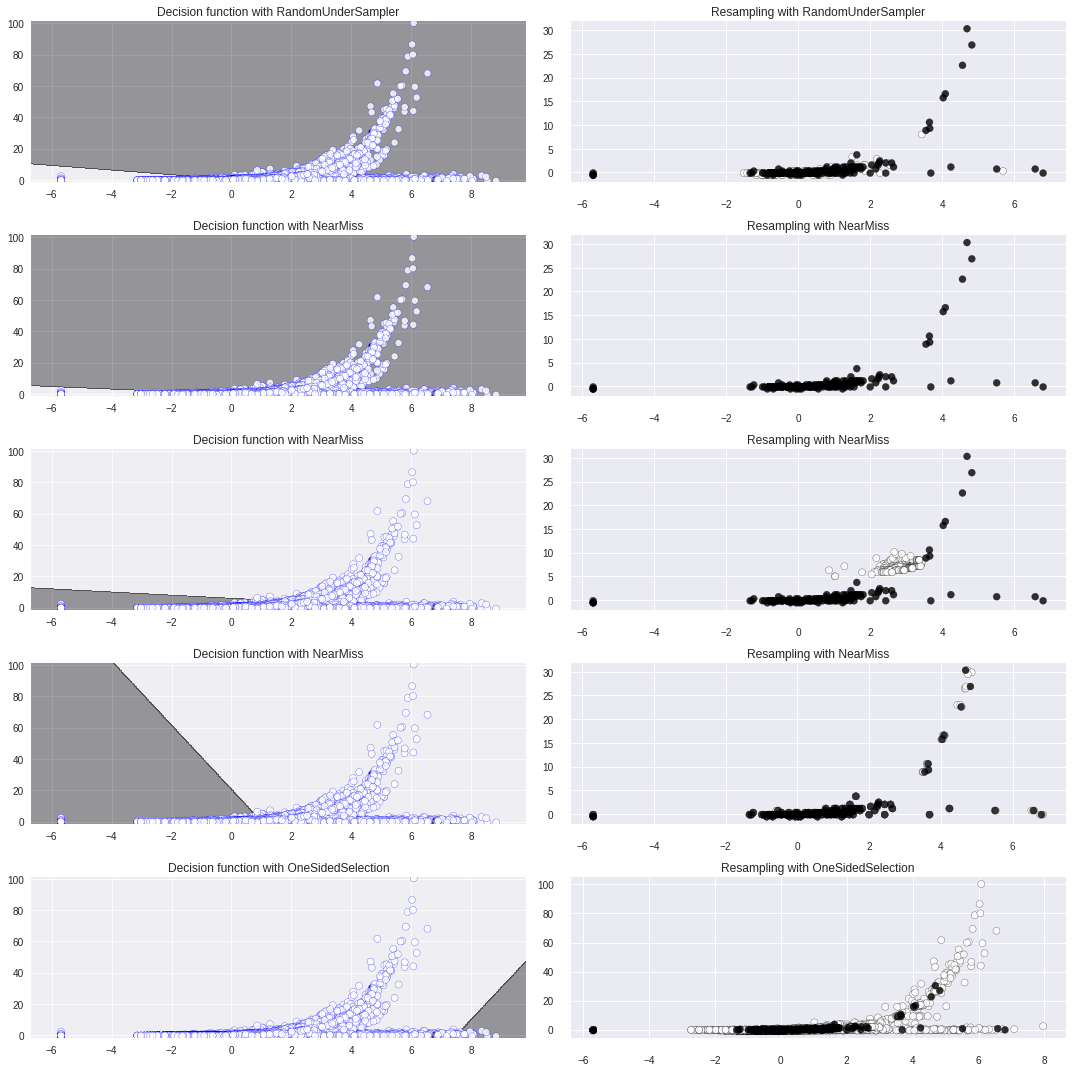

In [ ]:
clf = LogisticRegression(random_state = 3)

samplers = [undersampler_1, undersampler_2, undersampler_3, undersampler_4, undersampler_5]

fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(15, 15))
for ax, sampler in zip(axs, samplers):
    model = make_pipeline(sampler, clf).fit(X_train[['media_cost_log','viewable_impressions']], y_train)
    plot_decision_function(
        X_train, y_train, model, ax[0], title=f"Decision function with {sampler.__class__.__name__}"
    )
    plot_resampling(np.array(X_train[['media_cost_log','viewable_impressions']]), y_train, sampler, ax[1])

fig.tight_layout()

## 5.5 Decision boundaries over sampling tecniques

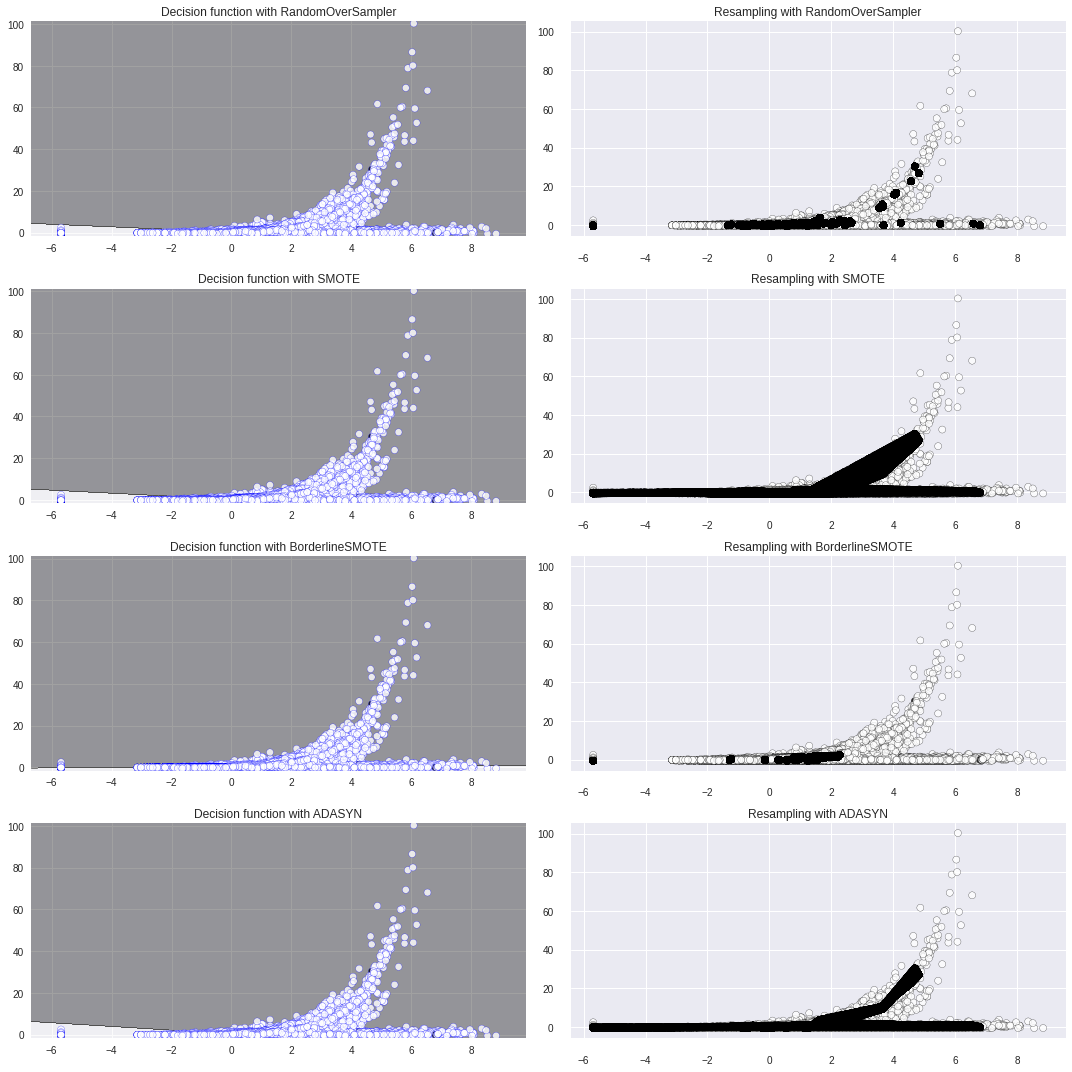

In [ ]:
clf = LogisticRegression(random_state = 3)

samplers = [oversampler_1, oversampler_2, oversampler_3, oversampler_4]

fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(15, 15))
for ax, sampler in zip(axs, samplers):
    model = make_pipeline(sampler, clf).fit(X_train[['media_cost_log','viewable_impressions']], y_train)
    plot_decision_function(
        X_train, y_train, model, ax[0], title=f"Decision function with {sampler.__class__.__name__}"
    )
    plot_resampling(np.array(X_train[['media_cost_log','viewable_impressions']]), y_train, sampler, ax[1])

fig.tight_layout()

# Appendix

## A Dimensional plots

In [ ]:
plt.hist(X_train.loc[where(y_train_under == label)]['media_cost_log'], bins =100 ,color = colors['c1'][0], alpha = 0.75)
plt.show()

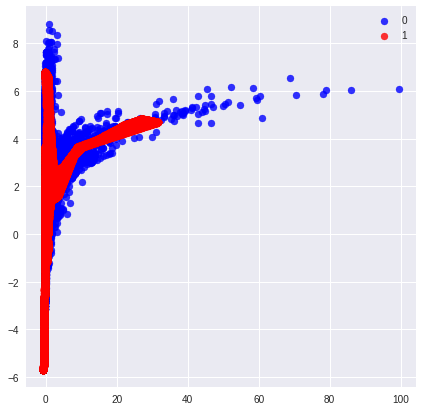

In [ ]:
# scatter plot of examples by class label

f, ax = plt.subplots(figsize=(7, 7))

colors_m = {0: 'blue', 1: 'red'}
for label, _ in counter_over.items():
    row_ix = where(y_train == label)[0]
    ax.scatter(X_train_over.loc[where(y_train_over == label)]['impressions'], 
                   X_train_over.loc[where(y_train_over == label)]['media_cost_log'], 
                   c = colors_m[label],
                   alpha = 0.5,
                   label=str(label))

pyplot.legend()
pyplot.show()

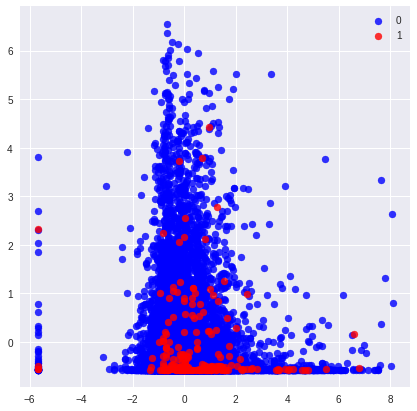

In [ ]:
# scatter plot of examples by class label
f, ax = plt.subplots(figsize=(7, 7))

colors_m = {0: 'blue', 1: 'red'}
for label, _ in counter_under.items():
    row_ix = where(y_train_under == label)[0]
    ax.scatter(X_train_under.loc[where(y_train_under == label)]['media_cost_log'], 
                   X_train_under.loc[where(y_train_under == label)]['city'], 
                   c = colors_m[label],
                   alpha = 0.5,
                   label=str(label))    

pyplot.legend()
pyplot.show()

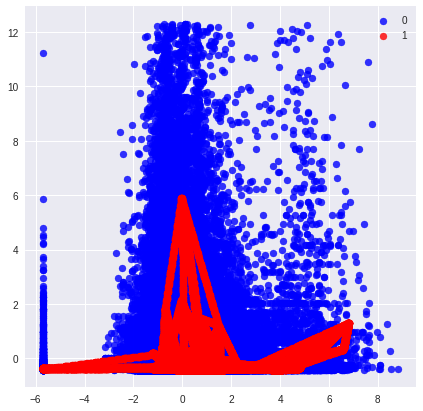

In [ ]:
# scatter plot of examples by class label
f, ax = plt.subplots(figsize=(7, 7))

colors_m = {0: 'blue', 1: 'red'}
for label, _ in counter_over.items():
    row_ix = where(y_train_over == label)[0]
    ax.scatter(X_train_over.loc[where(y_train_over == label)]['media_cost_log'], 
                   X_train_over.loc[where(y_train_over == label)]['app_url'], 
                   c = colors_m[label],
                   alpha = 0.5,
                   label=str(label))


pyplot.legend()
pyplot.show()

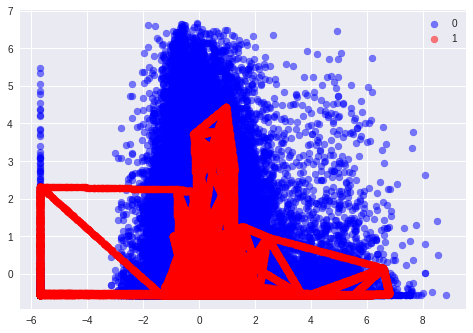

In [ ]:
# scatter plot of examples by class label
colors_m = {0: 'blue', 1: 'red'}
for label, _ in counter_over.items():
    row_ix = where(y_train_over == label)[0]
    pyplot.scatter(X_train_over.loc[where(y_train_over == label)]['media_cost_log'], 
                   X_train_over.loc[where(y_train_over == label)]['city'], 
                   c = colors_m[label],
                   alpha = 0.5,
                   label=str(label))

pyplot.legend()
pyplot.show()

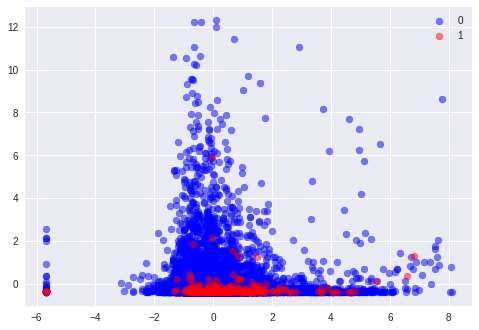

In [ ]:
colors_m = {0: 'blue', 1: 'red'}
for label, _ in counter.items():
    row_ix = where(y_train_under == label)[0]
    pyplot.scatter(X_train_under.loc[where(y_train_under == label)]['media_cost_log'], 
                   X_train_under.loc[where(y_train_under == label)]['app_url'], 
                   c = colors_m[label],
                   alpha = 0.5,
                   label=str(label))

pyplot.legend()
pyplot.show()

# References

https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/    

https://imbalanced-learn.org/stable/auto_examples/under-sampling/plot_comparison_under_sampling.html#sphx-glr-auto-examples-under-sampling-plot-comparison-under-sampling-py

https://machinelearningmastery.com/random-oversampling-and-undersampling-for-imbalanced-classification/

